<a href="https://colab.research.google.com/github/danteacosta/data_science/blob/master/Analisando_dados_do_AirBnb(Buenos_Aires).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados do AirBnb(Buenos Aires)**
O [AirBnb](https://https://www.airbnb.com.br/) é um serviço online para reservas de hospedagem, tendo se tornado **a maior rede hoteleira do mundo sem sequer ser dona de um quarto**.    
Toda a estrutura é dada por usuários que se cadastram e disponibilizam seus imóveis para viajantes e a plataforma é uma mediadora que lucra através de taxas por esse serviço.  
Algo muito interessante dessa empresa é sua cultura de disponibilizar dados no [Inside AirBnb](http://insideairbnb.com/get-the-data.html), isso permite que qualquer um faça análises e desenvolva soluções com *Data Science*.   
**Nesse notebook optei por trabalhar com a cidade de Buenos Aires, segundo destino internacional mais buscado pelos brasileiros de acordo com a plataforma Turismocity, mostrando o que fiz com os dados e quais insights consegui obter a partir de uma série de questionamentos**






# **Obtendo dados**
Todos os dados foram obtidos pelo [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e como essa análise é apenas inicial, esse trabalho foi elaborado com o arquivo mais simples e fácil de visualizar os resultados.

*   *listings.csv* - *Summary information and metrics for listings in Buenos Aires(good for visualizations)*







In [2]:
# importar pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#importar o arquivo listings.csv para um DataFrame:
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-04-26/visualisations/listings.csv")

## **Análise dos dados**
Nessa etapa o foco é tornar mais claro o entendimento de como os dados estão estruturados.





**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrando as entradas:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,3983,2,26,2019-11-28,0.27,1,365
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1593,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2987,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2987,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2987,1,66,2019-11-27,1.89,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificando quantas entradas existem no conjunto de dados possui e ver os tipos de cada coluna.

Vale lembrar que o *dataset* baixado é a versão mais simples do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa, com mais entradas de dados e variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 23729
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Um dataset é avaliado a partir de seu número de valores ausentes, na célula de código abaixo, quanto mais próximo do número 1, mais esse tipo de informação falta no conjunto. Dessa forma, temos as seguintes conclusões:

*   A coluna `neighbourhood_group` não possui nenhum valor preenchido
*   As variáveis `reviews_per_month` e `last_review` não foram preenchidas em aproximadamente 27,4% das ocasiões
*   Os valores em `name` e `host_name` estão faltando em alguns poucos casos, 0,0004% e 0,0001% respectivamente



In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.274221
last_review                       0.274221
name                              0.000421
host_name                         0.000126
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar como está feita a distribuição, será plotado um histograma

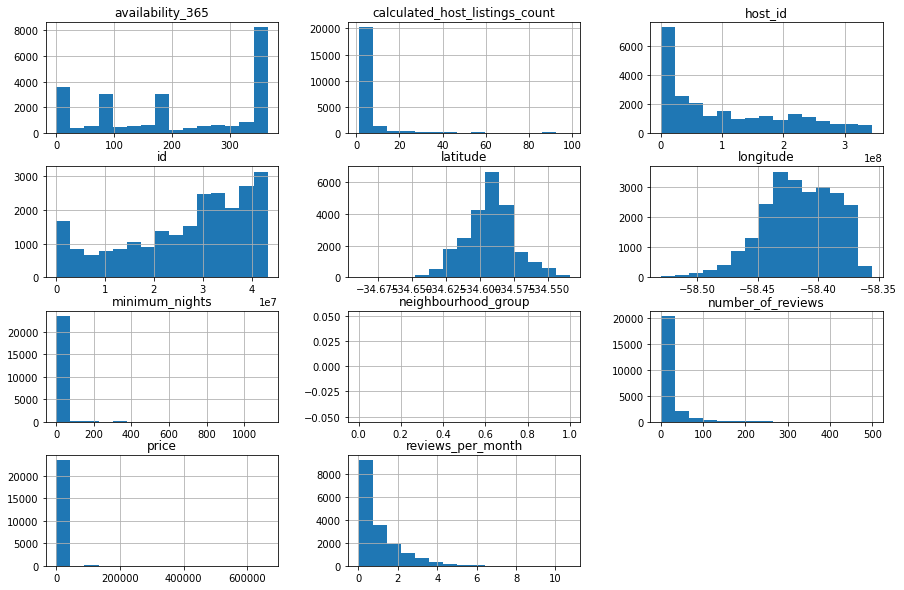

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**
Pela análise do histograma, pode-se constatar sim a presença de *outliers*(valores atípicos) e isso fica mais claro ao observar os gráficos de `price`, `minimum_nights` e `calculated_host_listings_count`.
Não há uma distribuição de valores e isso implica em uma distorção gráfica. Como uma confirmação sobre o que foi plotado, podemos usar alguns métodos simples e rápidos, são eles:

*   Resumo pela estatística através do método describe()
*   Fazer `boxplots`(diagramas de caixa) para a variável.



In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23729.000000,23729.000000,23729.00000,17222.000000,23729.000000,23729.000000
mean,4014.875595,6.027519,16.31333,1.053696,6.272704,209.383750
std,16075.326378,25.635455,32.32226,1.158269,14.675388,137.991373
min,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,1394.000000,1.000000,0.00000,0.230000,1.000000,89.000000
50%,2124.000000,3.000000,4.00000,0.640000,1.000000,180.000000
75%,3319.000000,4.000000,18.00000,1.470000,4.000000,363.000000
max,663732.000000,1125.000000,500.00000,10.730000,99.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses:

* A variável `price` possui 75% do valor abaixo de 3319, porém seu valor máximo é 663732 e o mínimo 0 implicaria em um aluguel de graça.
* A quantidade mínima de noites (`minimum_nights`) tem valores acima de 365 dias, o que é estranho para uma plataforma destinada a viajantes e aluguéis mais curtos.


#### Boxplot para minimum_nights

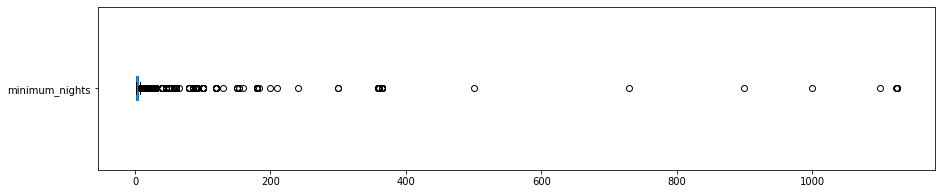

minimum_nights: valores acima de 30:
339 entradas
1.4286%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

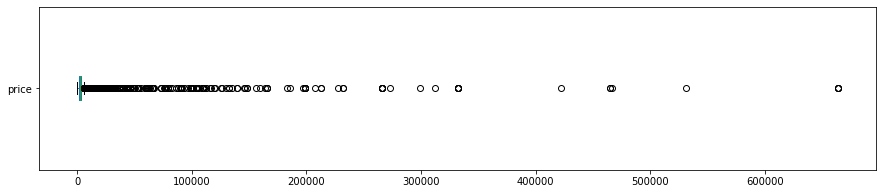


price: valores acima de 10000
791 entradas
3.3335%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 10000 pesos argentinos para price
print("\nprice: valores acima de 10000")
print("{} entradas".format(len(df[df.price > 10000])))
print("{:.4f}%".format((len(df[df.price > 10000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

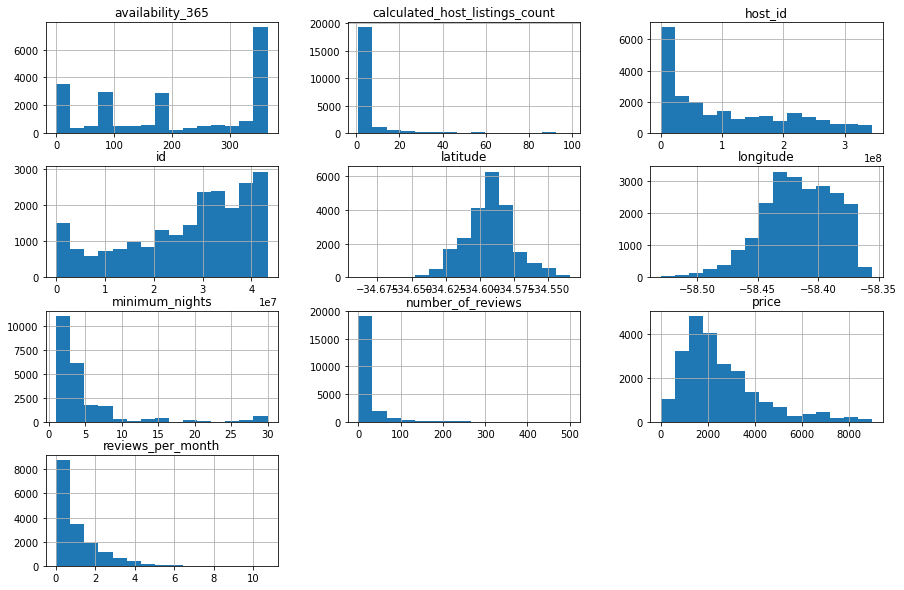

In [11]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 9000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Nesse contexto, estamos buscando relação ou semelhança entre duas variáveis.
Essa relação pode ser medida em função do coeficiente de correlação para estabelecer o quão forte é a correlação. Para isso, podem ser aplicados alguns métodos nas variáveis de interesse, como:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [12]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.015803,0.028020,-0.016465,0.161029,0.138264
minimum_nights,-0.015803,1.000000,-0.098840,-0.151607,0.094181,0.027875
number_of_reviews,0.028020,-0.098840,1.000000,0.628306,-0.054549,0.078193
reviews_per_month,-0.016465,-0.151607,0.628306,1.000000,-0.084372,-0.016650
calculated_host_listings_count,0.161029,0.094181,-0.054549,-0.084372,1.000000,0.097291
availability_365,0.138264,0.027875,0.078193,-0.016650,0.097291,1.000000


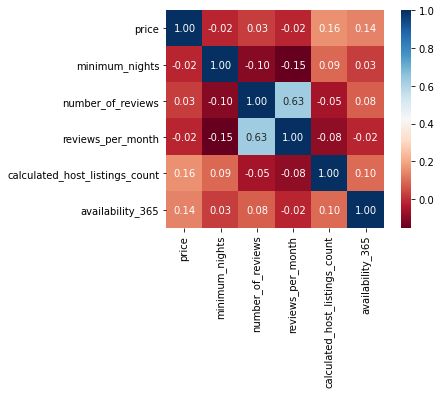

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Na plataforma existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

A partir do método `value_counts()` conseguimos saber a ocorrência de cada tipo dentro do *dataset*.

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17232
Private room        4391
Shared room          536
Hotel room           246
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.769114
Private room       0.195983
Shared room        0.023923
Hotel room         0.010980
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara em Buenos Aires?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros da cidade (*neighbourhoods*) a partir de seus preços de locação

In [16]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero    4821.867647
Villa Soldati    3761.666667
Palermo          2945.050187
Retiro           2787.037197
Recoleta         2769.829169
Versalles        2588.571429
Villa Devoto     2557.414286
San Telmo        2394.398852
Belgrano         2368.037901
Nuñez            2357.260674
Name: price, dtype: float64

Nessa análise vemos alguns bairros realmente de alto padrão, como Puerto Madero, mostrado na célula abaixo que esse valor é uma média de 204 imóveis. Porém, ao verificar um pouco mais sobre os resultados da pesquisa na internet, houve um resultado inesperado como Villa Soldati, o que poderia induzir uma pessoa vendo os dados a crer que é um bairro tão caro quanto os citados. Abaixo vemos melhor que há uma mostragem muito pequena, apenas 3 imóveis, o que abre margens para distorções assim.

In [17]:
#ver quantidade de imóveis de Puerto Madero
print(df_clean[df_clean.neighbourhood == "Puerto Madero"].shape)

(204, 15)


In [ ]:
# ver quantidade de imóveis de Villa Soldati
print(df_clean[df_clean.neighbourhood == "Villa Soldati"].shape)

# ver as 3 entradas de Villa Soldati
df_clean[df_clean.neighbourhood == "Villa Soldati"]

(3, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14026,32548725,Departamento amplio y cómodo,226116702,Aneth,Villa Soldati,-34.66094,-58.43645,Entire home/apt,2655,1,0,NaN,NaN,2,179
15710,34492123,Muy buen hambiente..tranquilidad y espacio,260348454,Nilsa,Villa Soldati,-34.65855,-58.44305,Private room,3983,1,0,NaN,NaN,1,364
16022,34811527,Departamento capital federal 4 ambientes grandes,262448759,Fer,Villa Soldati,-34.66639,-58.44716,Private room,4647,1,0,NaN,NaN,1,365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

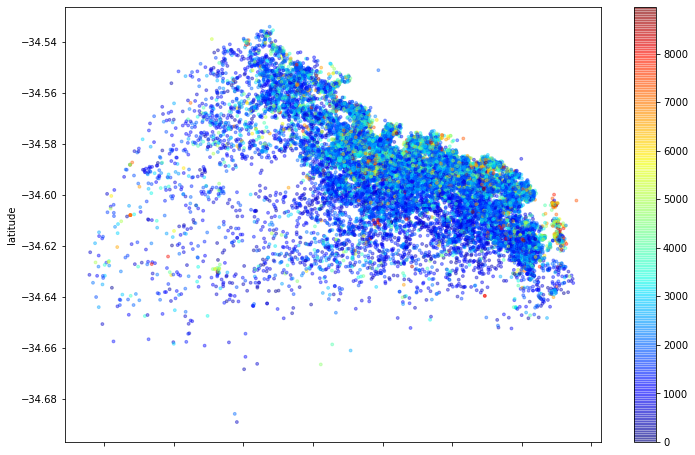

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusões**

Apesar de ter sido feita uma análise mais superficial dos dados disponibilizados pelo AirBnb, já conseguimos notar a presença de *outliers* em certas categorias.

Também foi possível constatar que haviam localidades com poucos imóveis disponíveis e essa pequena mostragem conseguiu distorcer algumas informações estatísticas, como o exemplo do bairro de Villa Soldati figurar entre os mais caros da cidade. Apesar disso, com poucos dados ainda assim conseguimos resultados consideravelmente precisos e com poucas distorções após tratar *outliers* pelo que averiguei posteriormente com pesquisas na internet. 

Vale ressaltar que o *dataset* é uma versão simplificada, ideal para trabalhos iniciais na Ciência de Dados. Em análises exploratórias mais detalhadas e completas, uma sugestão seria utilizar a versão maior, de 106 variáveis.